# Fraud Detection Model

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Users\User\Downloads\Downloads\Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,0


In [5]:
df.shape

(1048575, 11)

## Data Pre-processing

#### Basic Information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [8]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030,NaN
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862,NaN
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829,NaN
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438,NaN
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552,NaN
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495,NaN
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
### Checking null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There is no null values in the dataset so we can move further.

In [10]:
#### Checking Duplicate value
df.duplicated(subset=None,keep='first').sum()

0

#### Data Visualization

In [114]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<AxesSubplot:xlabel='type', ylabel='isFraud'>

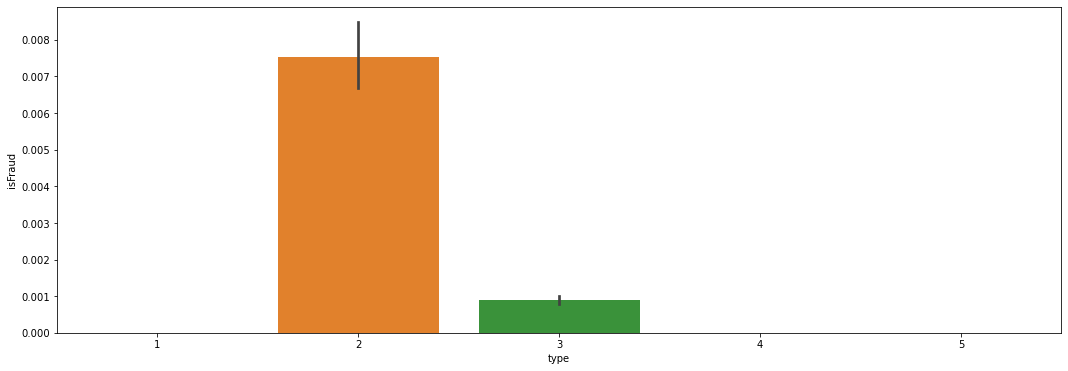

In [116]:
## Type vs Fraud using bar plot
sns.barplot(x='type',y='isFraud',data=df)


### Distribution of amount using histogram

<AxesSubplot:xlabel='amount', ylabel='Count'>

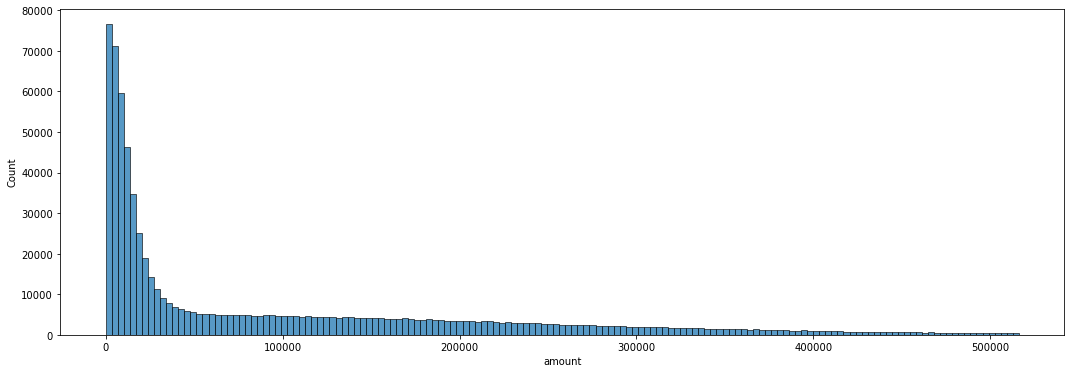

In [119]:
sns.histplot(x='amount',data=df)

There is no duplicate value in the dataset.

#### Detecting the outliers

<AxesSubplot:>

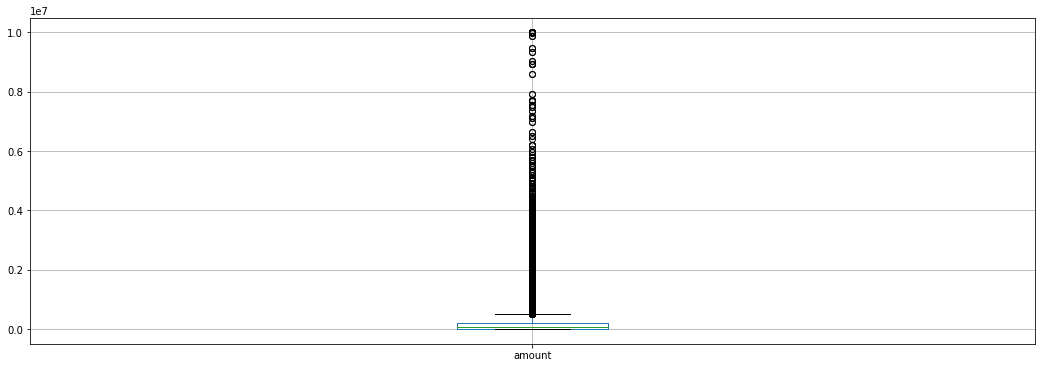

In [42]:
df.boxplot(column=['amount'])

<AxesSubplot:>

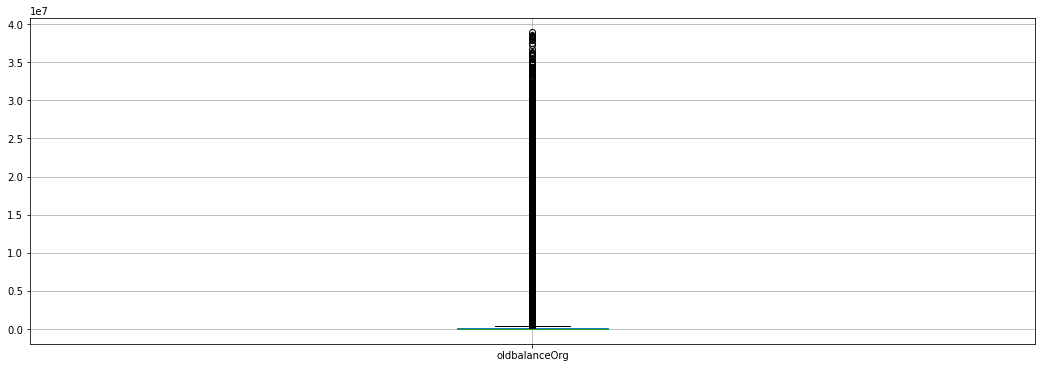

In [43]:
df.boxplot(column=['oldbalanceOrg'])

<AxesSubplot:>

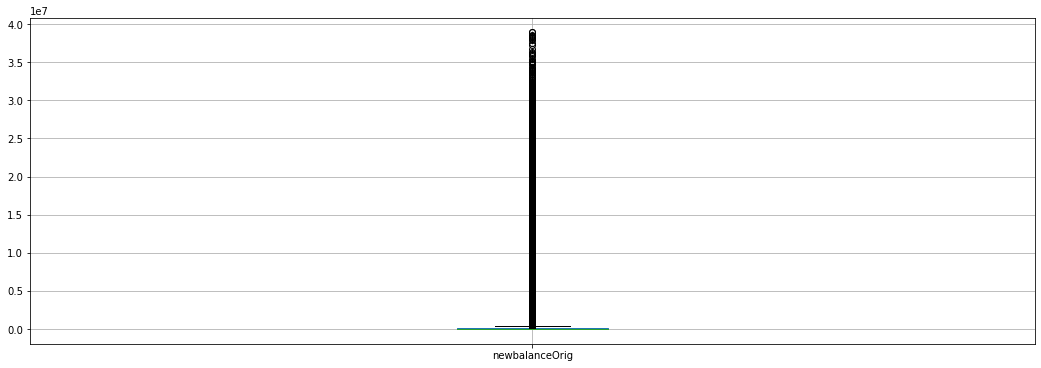

In [45]:
df.boxplot(column=['newbalanceOrig'])

<AxesSubplot:>

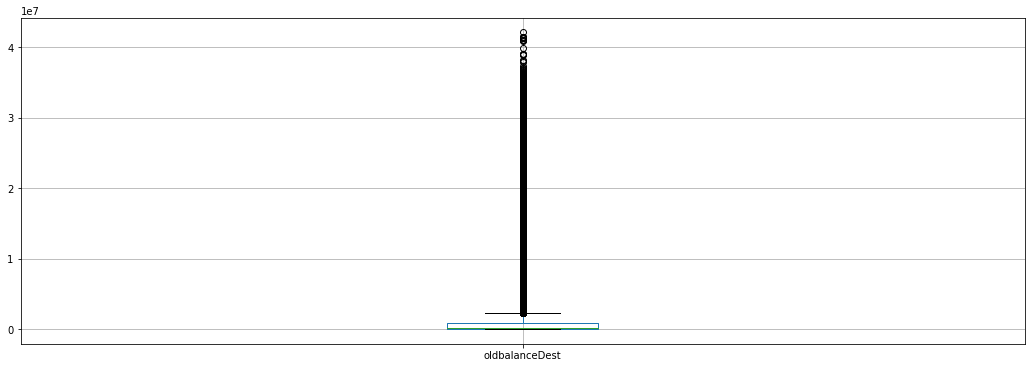

In [47]:
df.boxplot(column=['oldbalanceDest'])

<AxesSubplot:>

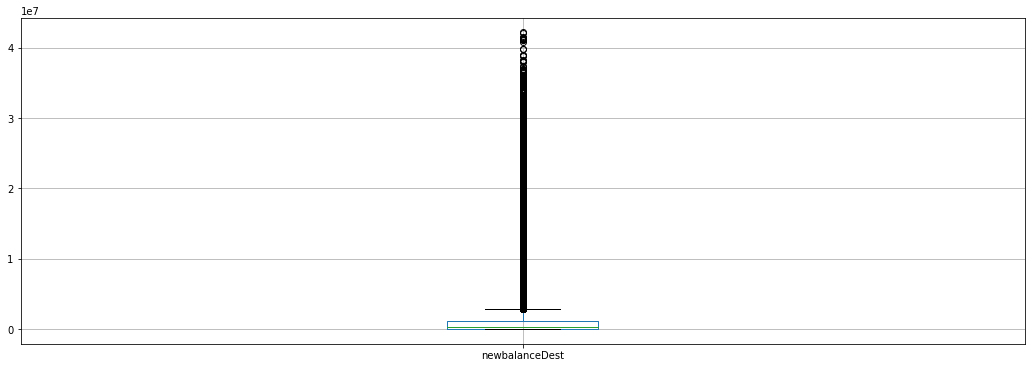

In [48]:
df.boxplot(column=['newbalanceDest'])

#### Removing those outliers

In [61]:
#### Applying Inter Quartile range
def outliers(df,ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    iqr=q3-q1
    
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    
    idx=df.index[ (df[ft]<lower_bound) | (df[ft]>upper_bound) ]
    
    return idx

In [62]:
## create an empty list to store the output indicies from multiple columns

index_list=[]
for feature in ['amount','newbalanceOrig','oldbalanceOrg','newbalanceDest','oldbalanceDest']:
    index_list.extend(outliers(df,feature))

In [63]:
index_list

[85,
 86,
 88,
 89,
 93,
 94,
 95,
 96,
 132,
 289,
 345,
 358,
 359,
 360,
 362,
 365,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 382,
 383,
 411,
 465,
 552,
 656,
 695,
 794,
 795,
 797,
 798,
 800,
 801,
 802,
 830,
 841,
 842,
 865,
 969,
 970,
 986,
 1077,
 1153,
 1154,
 1156,
 1157,
 1158,
 1159,
 1162,
 1163,
 1164,
 1202,
 1206,
 1207,
 1209,
 1211,
 1213,
 1214,
 1227,
 1228,
 1229,
 1231,
 1433,
 1699,
 1703,
 1718,
 1719,
 1783,
 1785,
 1786,
 1787,
 1788,
 1789,
 1791,
 1818,
 1819,
 1823,
 1837,
 1844,
 1862,
 1908,
 2149,
 2159,
 2188,
 2213,
 2247,
 2291,
 2338,
 2487,
 2504,
 2523,
 2566,
 2586,
 2587,
 2588,
 2591,
 2593,
 2595,
 2755,
 2895,
 3059,
 3060,
 3162,
 3163,
 3313,
 3341,
 3342,
 3344,
 3345,
 3346,
 3350,
 3351,
 3354,
 3557,
 3558,
 3560,
 3561,
 3562,
 3563,
 3567,
 3570,
 3573,
 3574,
 3628,
 3922,
 4031,
 4150,
 4151,
 4152,
 4155,
 4156,
 4157,
 4159,
 4160,
 4163,
 4164,
 4168,
 4327,
 4440,
 4441,
 4442,
 4443,
 4486,
 4492,
 4514,
 4525,
 46

In [64]:
### define a funtion 'remove'  which returns a cleaned dataframe without outliers

def remove(df,idx):
    idx=sorted(set(idx))
    df=df.drop(idx)
    return df

In [65]:
df=remove(df,index_list)

In [66]:
df.shape

(730316, 11)

<AxesSubplot:>

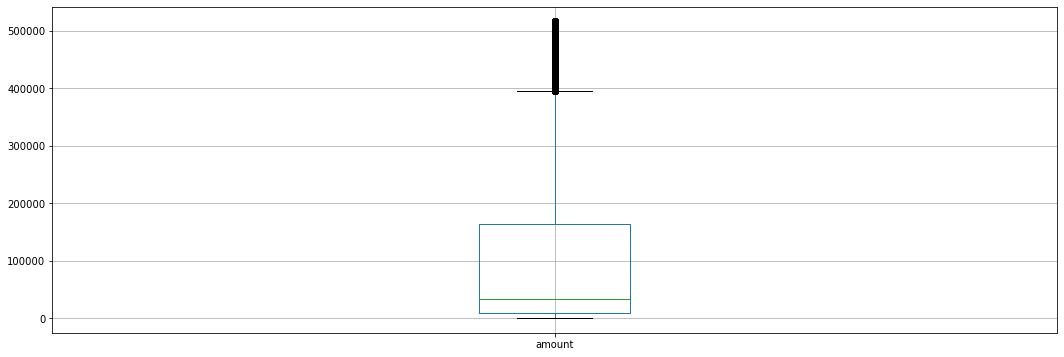

In [72]:
df.boxplot(column=['amount'])

We can see successfully remove the outliers from our dataset by using inter quartile range

#### Transform the feature 'type' apply map function

In [78]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [82]:
df['type']=df['type'].map({'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,'DEBIT':4,'CASH_IN':5})

In [83]:
df['type']

0          1
1          1
2          2
3          3
4          1
          ..
1048569    1
1048571    1
1048572    1
1048573    1
1048574    1
Name: type, Length: 730316, dtype: int64

In [84]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### plot the correlation matrix for checking multi-collinearity

In [85]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\User\anaconda3\lib\site-packages\pandas\io\formats\style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\User\anaconda3\lib\site-packages\pandas\io\formats\style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.021595,-0.029402,-0.012172,-0.014427,0.013086,-0.013058,0.027988,nan
type,-0.021595,1.000000,0.525201,-0.040050,0.319423,0.393773,0.391624,0.004693,nan
amount,-0.029402,0.525201,1.000000,-0.064930,0.033330,0.393023,0.526073,0.003186,nan
oldbalanceOrg,-0.012172,-0.040050,-0.064930,1.000000,0.619988,-0.102070,-0.106533,0.027335,nan
newbalanceOrig,-0.014427,0.319423,0.033330,0.619988,1.000000,-0.067906,-0.153624,-0.013043,nan
oldbalanceDest,0.013086,0.393773,0.393023,-0.102070,-0.067906,1.000000,0.938416,-0.007683,nan
newbalanceDest,-0.013058,0.391624,0.526073,-0.106533,-0.153624,0.938416,1.000000,-0.007553,nan
isFraud,0.027988,0.004693,0.003186,0.027335,-0.013043,-0.007683,-0.007553,1.000000,nan
isFlaggedFraud,nan,nan,nan,nan,nan,nan,nan,nan,nan


Conclusion: first 5 features in our dataset have more effect on the dependent variable "isFraud". 

### Creating Independent features

In [102]:
x=df.iloc[:,0:6]

In [103]:
x

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig
0,1,1,9839.64,C1231006815,170136.00,160296.36
1,1,1,1864.28,C1666544295,21249.00,19384.72
2,1,2,181.00,C1305486145,181.00,0.00
3,1,3,181.00,C840083671,181.00,0.00
4,1,1,11668.14,C2048537720,41554.00,29885.86
...,...,...,...,...,...,...
1048569,95,1,3210.11,C2113264897,11113.00,7902.89
1048571,95,1,9917.36,C1956161225,90545.00,80627.64
1048572,95,1,14140.05,C2037964975,20545.00,6404.95
1048573,95,1,10020.05,C1633237354,90605.00,80584.95


In [104]:
x=x.drop('nameOrig',axis=1)

In [105]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig
0,1,1,9839.64,170136.00,160296.36
1,1,1,1864.28,21249.00,19384.72
2,1,2,181.00,181.00,0.00
3,1,3,181.00,181.00,0.00
4,1,1,11668.14,41554.00,29885.86
...,...,...,...,...,...
1048569,95,1,3210.11,11113.00,7902.89
1048571,95,1,9917.36,90545.00,80627.64
1048572,95,1,14140.05,20545.00,6404.95
1048573,95,1,10020.05,90605.00,80584.95


In [106]:
y=df['isFraud']

In [107]:
y

0          0
1          0
2          1
3          1
4          0
          ..
1048569    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 730316, dtype: int64

### Train_Test_Split

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

### Apply Random Forest  classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier

# Create a Gausssian Classifier
clf=RandomForestClassifier(n_estimators=80)

# Train the model using the training sets
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

#### Plotting Confusion Matrix

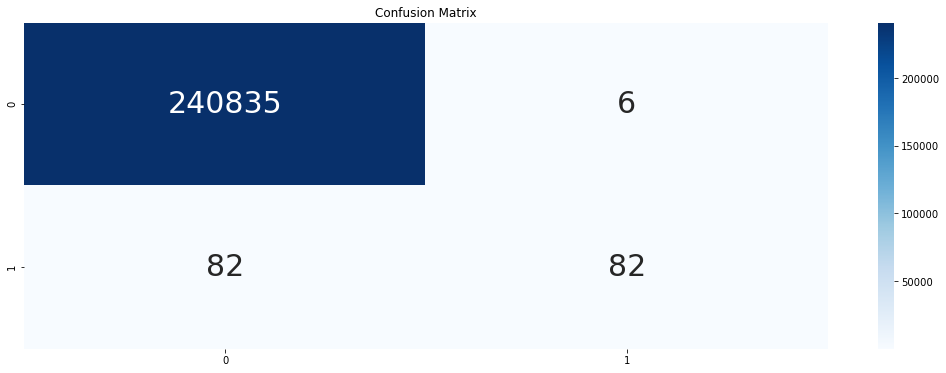

In [112]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
ax=plt.axes()
df_confusion=confusion
sns.heatmap(df_confusion,annot=True,annot_kws={'size':30},fmt='d',cmap='Blues',ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

#### Checking Model Performance

In [110]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    240841
           1       0.93      0.50      0.65       164

    accuracy                           1.00    241005
   macro avg       0.97      0.75      0.83    241005
weighted avg       1.00      1.00      1.00    241005



Model which is created have high predictive power to detect a transaction is fraud or not.

## Inferences

1. Describe my fraud detection model in elaboration:

    These model is basically work with a transaction is fraud or not. For making this kind of predictions there will be some features which have a direct impact towards the dependent feature 'isFraud'.I choose only those feature for train this model by using ensemble technique. If I included many features for model traing there will be high chance for overfiiting problem and the accuracy is going down.

2. What kind of prevention should be adopted while company update its infrastructure?

Company can use my model to update there infrastructure. They needs to check transaction happen for a particular account is not more than a certain range(fixed by that company). There will be some restriction about how much amount should be send from an account. All those things should be noticed.

# Thank You